In [1]:
# UFRJ/COPPE/PEE - Processamento de Sinais Aleatórios - 2019.3
# Professor: Luiz Wagner Pereira Biscainho
# Exercicio C1 - Processo Aleatório Autoregressivo
# Aluna: Maria Gabriella Andrade Felgas

import numpy as np

import matplotlib.pyplot as plt

from sympy.stats import E, Uniform
from sympy import Symbol, cos, sin, simplify

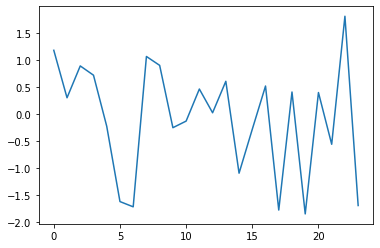

In [2]:
# Definindo os parâmetros
a1 = 0
a2 = 0.81
b = 1

# Definindo o numero de amostras a serem geradas
num_amostras = 24

# Considerando que o sinal é causal
# Ou seja, inicializando as amostras anteriores
# com zero
x1 = 0
x2 = 0

# Inicializando o vetor de amostras
x = np.zeros((num_amostras))

# Inicializando o ruído branco
mean = 0
std = 1 
num_samples = 24
samples = np.random.normal(mean, std, size=num_samples)
plt.plot(samples)
plt.show()

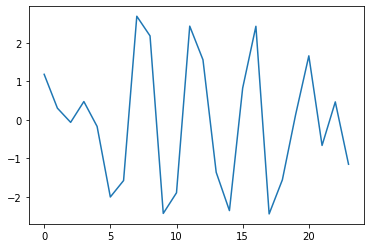

In [3]:
# Gerando as amostras do sinal

for i in range(num_amostras):
#     print('Pré:')
#     print('x(n): ', x[i])
#     print('x(n - 1): ', x1)
#     print('x(n - 2): ', x2)
    
    x[i] = - (a1 * x1) - (a2 * x2) + (b * samples[i])
    x2 = x1
    x1 = x[i]
    
#     print('Pós:')
#     print('x(n): ', x[i])
#     print('x(n - 1): ', x1)
#     print('x(n - 2): ', x2)
    
plt.plot(x)
plt.show()

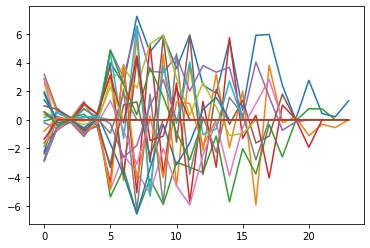

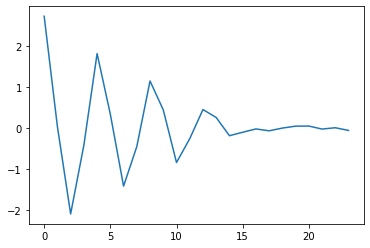

In [4]:
# Para o cálculo de autocorrelação amostral
# é preciso calcular a correlação de cada ponto
# com todos os outros considerando diferentes intervalos

R = np.zeros((num_amostras, num_amostras))
R_wss = np.zeros((num_amostras))

for n in range(num_amostras):
    for k in range(num_amostras - n):
        R[n, k] += E(x[n] * x[n + k])
        R_wss[k] += E(x[n] * x[n + k]) / 24

plt.plot(R)
plt.show()

plt.plot(R_wss)
plt.show()